## Gravity

In [1]:
import numpy as np
import matplotlib
import matplotlib.colors as mplcolors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sys


def random_mpl_color_rgb():
    return (np.random.uniform(), np.random.uniform(), np.random.uniform())


def random_mpl_color_rgba(alpha=0.25):
    rgba_tup = random_mpl_color_rgb() + (alpha,)
    return rgba_tup


def random_mpl_color_rgb_rgba(alpha=0.25):
    """
    generate a pair of rgb and rgba color, both of them have same R G B value.
    """
    rgb_tup = random_mpl_color_rgb()
    rgba_tup = rgb_tup + (alpha,)
    return rgb_tup, rgba_tup


class Boite:
    def __init__(self, point_ref, longeur, largeur, hauteur):
        assert isinstance(point_ref, tuple)
        assert len(point_ref) == 3
        self.x = point_ref[0]
        self.y = point_ref[1]
        self.z = point_ref[2]
        self.longeur = longeur
        self.largeur = largeur
        self.hauteur = hauteur

        # fristly we think the reference point is at the origin
        self._temp_sommets = np.array([[-longeur / 2.0, -largeur / 2.0, -hauteur / 2.0],
                                       [longeur / 2.0, -largeur / 2.0, -hauteur / 2.0],
                                       [longeur / 2.0, largeur / 2.0, -hauteur / 2.0],
                                       [-longeur / 2.0, largeur / 2.0, -hauteur / 2.0],
                                       [-longeur / 2.0, -largeur / 2.0, hauteur / 2.0],
                                       [longeur / 2.0, -largeur / 2.0, hauteur / 2.0],
                                       [longeur / 2.0, largeur / 2.0, hauteur / 2.0],
                                       [-longeur / 2.0, largeur / 2.0, hauteur / 2.0]])

    def translation(self, length_x, length_y, length_z):
        self.x = self.x + length_x
        self.y = self.y + length_y
        self.z = self.z + length_z

    def rotation3d(self, alpha, beta, gamma):
        """
        :param alpha: perform a rotation about x axis
        :param beta: perform a rotation about y axis
        :param gamma: perform a rotation about z axis
        :return:
        """
        rx = np.array([[1, 0, 0],
                       [0, np.cos(alpha), -np.sin(alpha)],
                       [0, np.sin(alpha), np.cos(alpha)]])
        ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                       [0, 1, 0],
                       [-np.sin(beta), 0, np.cos(beta)]])
        rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                       [np.sin(gamma), np.cos(gamma), 0],
                       [0, 0, 1]])
        self._temp_sommets = np.transpose(rz.dot(ry.dot(rx.dot(np.transpose(self._temp_sommets)))))
        self._update_verts()

    def _update_sommets(self):
        # after some operation we need to translate object to real location.
        self.sommets = np.ones((self._temp_sommets.shape[0], 1)) * np.array(
            [self.x, self.y, self.z]) + self._temp_sommets

    def _update_verts(self):
        # obtain all surfaces.
        self._update_sommets()
        self.verts = [[self.sommets[0], self.sommets[1], self.sommets[2], self.sommets[3]],
                      [self.sommets[4], self.sommets[5], self.sommets[6], self.sommets[7]],
                      [self.sommets[0], self.sommets[1], self.sommets[5], self.sommets[4]],
                      [self.sommets[2], self.sommets[3], self.sommets[7], self.sommets[6]],
                      [self.sommets[1], self.sommets[2], self.sommets[6], self.sommets[5]],
                      [self.sommets[4], self.sommets[7], self.sommets[3], self.sommets[0]]]

    def getVerts(self):
        self._update_verts()
        return self.verts

    def getSommets(self):
        self._update_sommets()
        return self.sommets

    def getPoly3d(self, facecolors=None, edgecolors=None):
        if facecolors == None and edgecolors == None:
            edgecolors, facecolors = random_mpl_color_rgb_rgba()
        elif facecolors == None and edgecolors != None:
            if isinstance(edgecolors, str):
                edgecolors = mplcolors.to_rgb(edgecolors)
            assert isinstance(edgecolors, tuple)
            facecolors = (edgecolors[0], edgecolors[1], edgecolors[2]) + (0.25,)
        elif edgecolors == None and facecolors != None:
            if isinstance(facecolors, str):
                facecolors = mplcolors.to_rgb(facecolors)
            assert isinstance(facecolors, tuple)
            edgecolors = (facecolors[0], facecolors[1], facecolors[2])
        self._update_verts()
        poly3d = Poly3DCollection(self.verts,
                                  facecolors=facecolors, linewidths=1, edgecolors=edgecolors)
        return poly3d


class Camion(Boite):
    def __init__(self, point_ref, longeur, largeur, hauteur):
        super().__init__(point_ref, longeur, largeur, hauteur)

    @classmethod
    def atOrigine(cls, longeur, largeur, hauteur):
        return cls((longeur / 2.0, largeur / 2.0, hauteur / 2.0), longeur, largeur, hauteur)

    def init(self, camion_color=(1, 1, 1, 0), edgecolors="black"):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection="3d")
        self.ax1.set_aspect(1)
        self.ax1.add_collection3d(super().getPoly3d(facecolors=camion_color, edgecolors=edgecolors))

    def addPoly3d(self, poly3d):
        self.ax1.add_collection3d(poly3d)

    def draw(self, show_axis=False, show_axis_label=False, show_grid=False):
        axis_switch = "on" if show_axis else "off"
        plt.axis(axis_switch)
        if show_axis_label == True:
            self.ax1.set_xlabel("X")
            self.ax1.set_ylabel("Y")
            self.ax1.set_zlabel("Z")
        self.ax1.grid(show_grid)
        plt.show()

In [2]:
B = np.load("B_15_items.npy")
np.save("B.npy", B)
nb_composant = B.shape[0]
print(B)

C = np.load("C.npy")
print(C)

[[2. 4. 4.]
 [3. 5. 3.]
 [5. 1. 4.]
 [4. 2. 2.]
 [1. 4. 3.]
 [4. 4. 4.]
 [3. 1. 5.]
 [3. 1. 2.]
 [1. 3. 2.]
 [4. 2. 3.]
 [3. 5. 1.]
 [5. 4. 2.]
 [5. 2. 3.]
 [5. 4. 5.]
 [5. 3. 2.]]
[10. 10. 10.]


In [3]:
np.random.seed(0)
X = np.random.randint(0, 10, size=(nb_composant,3)).astype(np.float)
print(X)

[[5. 0. 3.]
 [3. 7. 9.]
 [3. 5. 2.]
 [4. 7. 6.]
 [8. 8. 1.]
 [6. 7. 7.]
 [8. 1. 5.]
 [9. 8. 9.]
 [4. 3. 0.]
 [3. 5. 0.]
 [2. 3. 8.]
 [1. 3. 3.]
 [3. 7. 0.]
 [1. 9. 9.]
 [0. 4. 7.]]


<IPython.core.display.Javascript object>


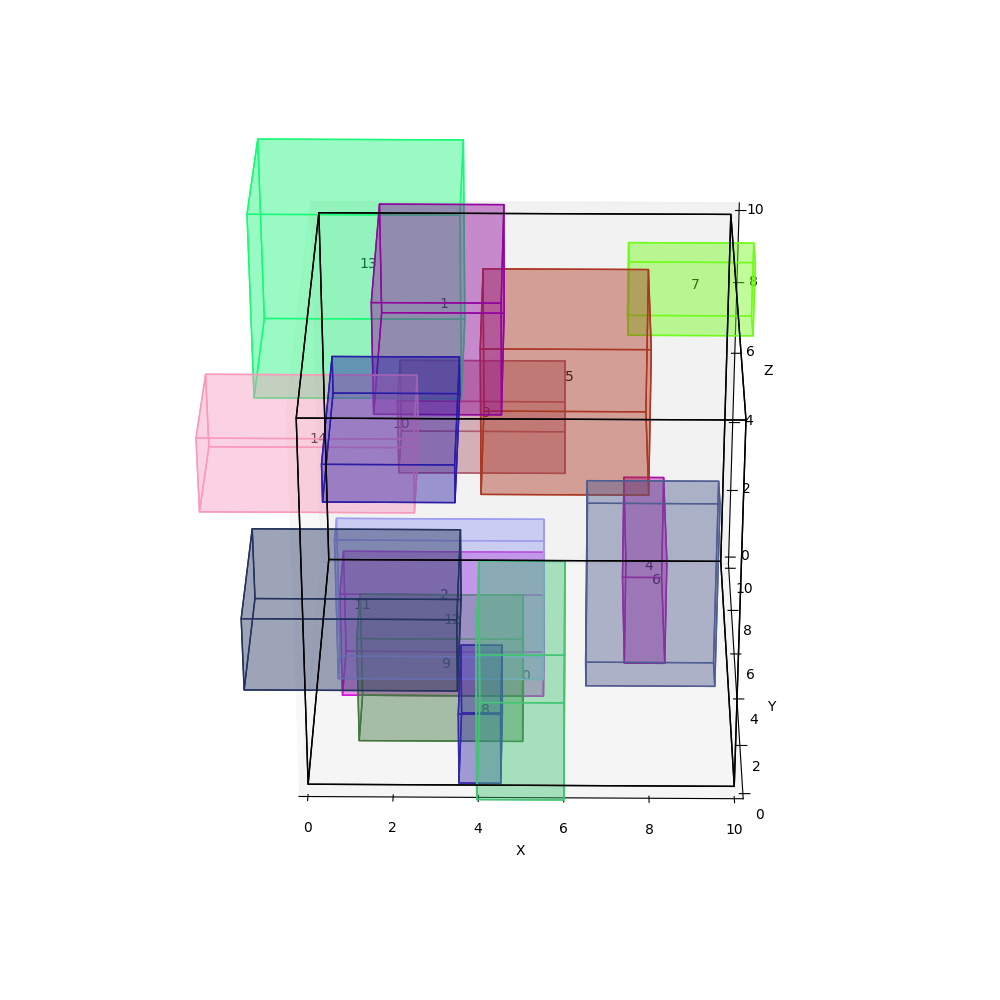

In [4]:
%matplotlib notebook
boite_color_list = []
for i in range(nb_composant):
    boite_color_list.append(random_mpl_color_rgba())

camion = Camion.atOrigine(C[0], C[1], C[2]);
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection="3d")    
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_xlim(-0, C[0])
ax1.set_ylim(-0, C[1])
ax1.set_zlim(-0, C[2])
ax1.grid(False)
ax1.add_collection3d(camion.getPoly3d(facecolors=(1, 1, 1, 0), edgecolors="black"))
boite_list = []
for i in range(X.shape[0]):
    boite = Boite((X[i, 0], X[i, 1], X[i, 2]), B[i, 0], B[i, 1], B[i, 2])
    boite_list.append(boite)
    ax1.add_collection3d(boite.getPoly3d(facecolors=boite_color_list[i]))
    ax1.text(*X[i, :], str(i), 'x')
plt.show()
fig.savefig("15-item.png")

In [5]:
X_copy = X.copy() 
z_set = set(X_copy[:,2])
placement_order = []
while(len(z_set)!=0):
    lowest_z = min(z_set)
    idx = X_copy[:, 2] == lowest_z 
    msg_str = []
    for i, j in enumerate(list(idx)):
        if j == True:
            msg_str.append(i)
    print("lowest z: {}, Number of lowest composant: {}".format(lowest_z, msg_str))
#     print("X: \n"+str(X_copy[idx]))
#     print("B: \n"+str(B[idx]))
    placement_order.extend(msg_str)
    z_set.remove(lowest_z)
    
print("Placement order: ", placement_order)

lowest z: 0.0, Number of lowest composant: [8, 9, 12]
lowest z: 1.0, Number of lowest composant: [4]
lowest z: 2.0, Number of lowest composant: [2]
lowest z: 3.0, Number of lowest composant: [0, 11]
lowest z: 5.0, Number of lowest composant: [6]
lowest z: 6.0, Number of lowest composant: [3]
lowest z: 7.0, Number of lowest composant: [5, 14]
lowest z: 8.0, Number of lowest composant: [10]
lowest z: 9.0, Number of lowest composant: [1, 7, 13]
Placement order:  [8, 9, 12, 4, 2, 0, 11, 6, 3, 5, 14, 10, 1, 7, 13]


## overlap function 

In [6]:
def overlap2d(center_1, length_1, width_1, center_2, length_2, width_2):
    overlap_length = max(0, min(center_1[0] + length_1/2, center_2[0]+length_2/2) - 
                        max(center_1[0] - length_1/2, center_2[0] - length_2/2))
    overlap_width = max(0, min(center_1[1] + width_1/2, center_2[1]+width_2/2) - 
                        max(center_1[1] - width_1/2, center_2[1] - width_2/2))
    overlap_area = overlap_length * overlap_width 
    ret = False
    if overlap_area != 0:
        ret = True 
    return ret, overlap_area 

## Placement 

In [7]:
placed_list = []
for composant_i in placement_order:
    print("considering composant i >>> {} ...".format(composant_i))
    print(placed_list)
    z_last_composant = 0 
    if len(placed_list)!=0:
        overlap_list = []
        for composant_j in placed_list:
            print("--composant j >>> {}".format(composant_j))
            ret, _ = overlap2d(X[composant_i], B[composant_i, 0], B[composant_i, 1],
                              X[composant_j], B[composant_j, 0], B[composant_j, 1])
            if(ret):
                overlap_list.append(composant_j)
        print("overlap_list: {}".format(overlap_list))
        if len(overlap_list) == 0 :
            z_last_composant = 0
        else: 
            z_last_composant = np.max(X[overlap_list, 2]+B[overlap_list, 2]/2)
    z_i = B[composant_i, 2]/2 + z_last_composant 
    print("z_i: ", z_i)
    X[composant_i, 2] = z_i
    
    placed_list.append(composant_i)

considering composant i >>> 8 ...
[]
z_i:  1.0
considering composant i >>> 9 ...
[8]
--composant j >>> 8
overlap_list: [8]
z_i:  3.5
considering composant i >>> 12 ...
[8, 9]
--composant j >>> 8
--composant j >>> 9
overlap_list: []
z_i:  1.5
considering composant i >>> 4 ...
[8, 9, 12]
--composant j >>> 8
--composant j >>> 9
--composant j >>> 12
overlap_list: []
z_i:  1.5
considering composant i >>> 2 ...
[8, 9, 12, 4]
--composant j >>> 8
--composant j >>> 9
--composant j >>> 12
--composant j >>> 4
overlap_list: [9]
z_i:  7.0
considering composant i >>> 0 ...
[8, 9, 12, 4, 2]
--composant j >>> 8
--composant j >>> 9
--composant j >>> 12
--composant j >>> 4
--composant j >>> 2
overlap_list: [8]
z_i:  4.0
considering composant i >>> 11 ...
[8, 9, 12, 4, 2, 0]
--composant j >>> 8
--composant j >>> 9
--composant j >>> 12
--composant j >>> 4
--composant j >>> 2
--composant j >>> 0
overlap_list: [9, 2]
z_i:  10.0
considering composant i >>> 6 ...
[8, 9, 12, 4, 2, 0, 11]
--composant j >>> 8
--

In [8]:
print(X)

[[ 5.   0.   4. ]
 [ 3.   7.  15.5]
 [ 3.   5.   7. ]
 [ 4.   7.   4. ]
 [ 8.   8.   1.5]
 [ 6.   7.  11. ]
 [ 8.   1.   2.5]
 [ 9.   8.  14. ]
 [ 4.   3.   1. ]
 [ 3.   5.   3.5]
 [ 2.   3.  13.5]
 [ 1.   3.  10. ]
 [ 3.   7.   1.5]
 [ 1.   9.  19.5]
 [ 0.   4.  12. ]]


In [9]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection="3d")    
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_xlim(-0, C[0])
ax1.set_ylim(-0, C[1])
ax1.set_zlim(-0, C[2])
ax1.grid(False)
ax1.add_collection3d(camion.getPoly3d(facecolors=(1, 1, 1, 0), edgecolors="black"))
boite_list = []
for i in range(X.shape[0]):
    boite = Boite((X[i, 0], X[i, 1], X[i, 2]), B[i, 0], B[i, 1], B[i, 2])
    boite_list.append(boite)
    ax1.add_collection3d(boite.getPoly3d(facecolors=boite_color_list[i]))
    ax1.text(*X[i, :], str(i), 'x')
plt.show()
fig.savefig("15-item-gravity.png")

<IPython.core.display.Javascript object>